In [1]:
import pandas as pd
import numpy as np

In [2]:
# Leemos nuestro conjunto de datos (dataset)
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Revisamos los primeros cinco valores del conjunto de datos, de acá podemos analizar que variables nos interesan para el modelo
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Análisis exploratorio de los datos. 

## ¿Qué es?
### Proceso inicial para entender los datos. Incluye la inspección de distribuciones, relaciones entre variables y la identificación de patrones o valores atípicos.

## ¿Por qué es importante?
- Nos ayuda a comprender la estructura y calidad de los datos.
- Identifica problemas como valores faltantes, distribuciones sesgadas y relaciones importantes entre variables.
- Sienta las bases para las decisiones de preprocesamiento y modelado.

## Ejemplos de insights buscados:
- ¿Hay una relación entre género y supervivencia?
- ¿Los pasajeros de ciertas clases tienen más probabilidades de sobrevivir?
- ¿Qué proporción de datos tiene valores faltantes?

In [4]:
# Verificamos el número de filas y columnas que tenga nuestro dataset (filas, columnas)
df.shape

(891, 12)

In [5]:
# Imprimimos un resumen de nuestro conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Comprobamos que no existan valores nulos, de haberlos debemos buscar una forma de trabajar con ellos o eliminarlos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Resumen de las variables

### Variables categóricas: Sex, Embarked, Cabin (muchos valores nulos).
### Variables numéricas: Age, Fare, SibSp, Parch.
### Identificadores únicos: PassengerId, Name, Ticket.

In [7]:
# Revisamos el resumen estadistico de nuestro dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### La tarifa promedio (Fare) es de 32.20, con un máximo de 512.33.
### Survived: 38.4% sobrevivieron.
### Pclass: Predomina la clase 3.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

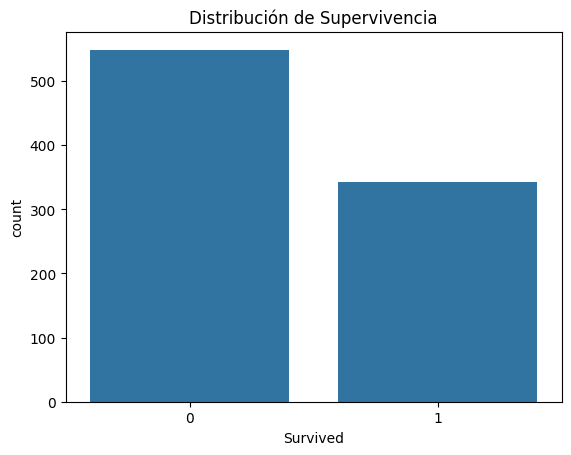

In [9]:
# Distribución de supervivencia
sns.countplot(x='Survived', data=df)
plt.title("Distribución de Supervivencia")
plt.show()

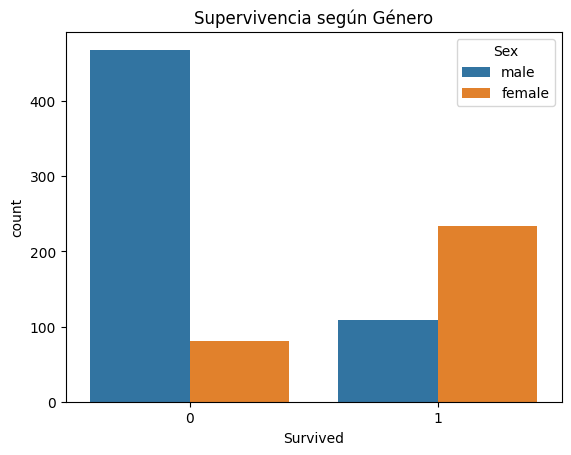

In [10]:
# Relación entre supervivencia y género
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Supervivencia según Género")
plt.show()

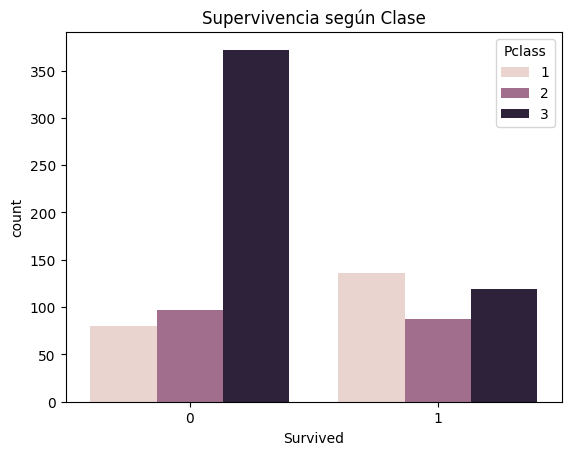

In [11]:
# Relación entre clase y supervivencia
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Supervivencia según Clase")
plt.show()

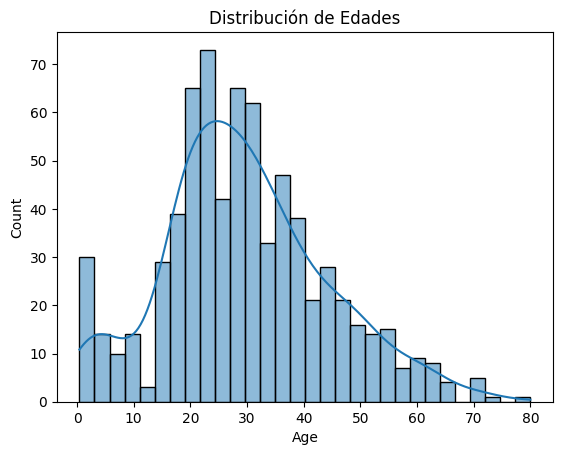

In [12]:
# Distribución de edades
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribución de Edades")
plt.show()

# 2. Preprocesamiento de los datos

### El preprocesamiento prepara los datos para el modelado al manejar inconsistencias, transformar variables y reducir ruido en el dataset.

## ¿Por qué es importante?
- Los modelos no pueden manejar valores faltantes, por lo que es necesario tratarlos (relleno o eliminación).
- Las variables categóricas deben codificarse numéricamente para ser entendidas por los modelos.
- Reducir datos irrelevantes (como nombres o boletos) disminuye la complejidad y el ruido.

## Pasos clave:
- Manejo de valores nulos: Rellenar con la mediana/moda evita eliminar demasiados datos.
- Codificación de variables categóricas: Convertir columnas como Sex en variables dummy (1/0).
- Eliminación de columnas: Por ejemplo, Cabin tiene demasiados valores nulos para ser útil.

In [13]:
# Rellenar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
# Eliminamos las columnas irrelevantes (con demasiados nulos y no necesarias para nuestro modelo)
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# 3. Selección de caracteristicas

### El proceso de elegir las variables más relevantes para el modelo basándose en su relación con la variable objetivo (en este caso, Survived).

## ¿Por qué es importante?
- Mejora el rendimiento del modelo al eliminar variables irrelevantes o redundantes.
- Reduce el tiempo de entrenamiento y la complejidad del modelo.
- Minimiza el riesgo de overfitting.

## Cómo se hace:
- Correlaciones: Evaluar qué variables están más relacionadas con la supervivencia.
- SelectKBest: Herramienta que asigna puntajes a las variables basándose en métricas estadísticas.

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de características
X = df.drop('Survived', axis=1)
y = df['Survived']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Ver importancia de las características
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores.sort_values(by='Score', ascending=False)

,Feature,Score
6,Sex_male,372.405724
1,Pclass,115.031272
5,Fare,63.030764
8,Embarked_S,20.374460
4,Parch,5.963464
2,Age,3.761528
3,SibSp,1.110572
0,PassengerId,0.022285
7,Embarked_Q,0.011846


# 4. Dividir el conjunto de datos en Train y Test

Separar los datos en un conjunto para entrenar el modelo (Train) y otro para evaluar su desempeño (Test).

## ¿Por qué es importante?
- Permite evaluar cómo generaliza el modelo a datos no vistos.
- Reduce el riesgo de sobreajuste (cuando el modelo aprende "de memoria" el conjunto de entrenamiento).
- Asegura una evaluación objetiva de las métricas de desempeño.

## Proporción común:
- 80% entrenamiento, 20% prueba.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 9)
Test shape: (179, 9)


# 5. Entrenamos el modelo

### Un árbol de decisión es un modelo supervisado que divide el espacio de las características en regiones jerárquicamente, basado en criterios como la entropía o el índice de Gini.

## Por qué elegir Árboles de Decisión?

- Simplicidad e interpretabilidad
- Manejo de datos mixtos
- Identificación de interacciones
- Control sobre la complejidad

## Ventajas Prácticas en el Titanic Dataset
- Sex: La variable categórica "hombre/mujer" tiene un impacto directo en la supervivencia. El árbol puede dividir rápidamente los datos basándose en esta característica.
- Pclass: Las clases sociales están relacionadas con las probabilidades de acceso a botes salvavidas.
- Age: Captura un gradiente natural (niños con más prioridad que adultos en el rescate).
- Fare: Puede ser un proxy del estatus económico.

## Estrategia de Configuración
- max_depth: Limitar la profundidad para evitar sobreajuste (e.g., 3-5 niveles suelen ser suficientes para conjuntos pequeños como este).
- criterion: Elegir entre gini (por defecto) o entropy. Ambos son adecuados, aunque gini suele ser más rápido computacionalmente.
- min_samples_split y min_samples_leaf: Garantizar que los nodos finales tengan un tamaño razonable para evitar divisiones demasiado específicas.

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# 6. Evaluamos el modelo

### Medir cómo de bien predice el modelo utilizando el conjunto de prueba.

## ¿Por qué es importante?
- Nos asegura que el modelo funciona correctamente con datos nuevos.
- Nos da métricas clave como: Precisión, Recall, F1-Score y Matriz de confusión

## Ejemplo:
### Un buen F1-Score muestra que el modelo equilibra correctamente precisión y recall, lo que es crucial en problemas desbalanceados como este.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Exactitud:", accuracy_score(y_test, y_pred))

# El modelo clasifica correctamente alrededor el 80% de los casos.

Exactitud: 0.7988826815642458


## El reporte incluye:

- Precisión: Qué tan preciso fue el modelo en cada clase (0 = no sobrevivió, 1 = sobrevivió).
- Recall: Qué proporción de cada clase fue correctamente identificada.
- F1-Score: Balance entre precisión y recall.
- Support: Cantidad de muestras reales de cada clase.

In [20]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## Matriz de confusión:

- Verdaderos positivos (TP): Esquinas superior izquierda.
- Verdaderos negativos (TN): Esquinas inferior derecha.
- Falsos positivos (FP): Esquinas superior derecha.
- Falsos negativos (FN): Esquinas inferior izquierda.

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[93 12]
 [24 50]]


## Interpretación de la matriz de confusión

- Verdaderos positivos (93): Pasajeros correctamente clasificados como "No sobrevivió".
- Falsos positivos (12): Pasajeros que fueron clasificados como "Sobrevivió" pero no sobrevivieron.
- Falsos negativos (24): Pasajeros que realmente sobrevivieron pero fueron clasificados como "No sobrevivió".
- Verdaderos negativos (50): Pasajeros correctamente clasificados como "Sobrevivió".

# 7. Visualizar los resultados

### Crear gráficas que expliquen el desempeño del modelo y la importancia de las características.

## ¿Por qué es importante?
- Facilita la interpretación de los resultados.
- Ayuda a comunicar hallazgos a otras personas (clientes, colegas, etc.).
- Proporciona insights sobre las variables más relevantes.

## Ejemplo de gráficas:
- Matriz de confusión: Muestra los verdaderos positivos/negativos y errores del modelo.
- Importancia de características: Muestra cuáles variables influyen más en las predicciones.

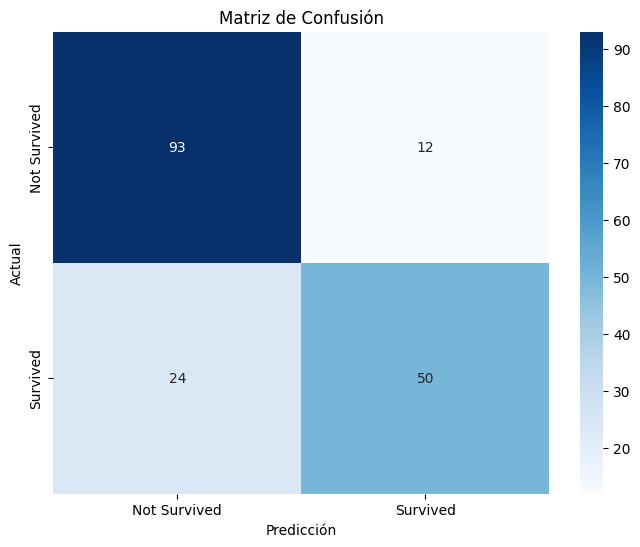

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

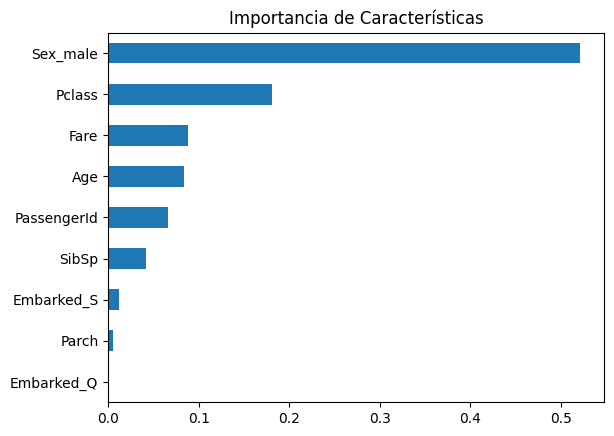

In [23]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title='Importancia de Características')
plt.show()

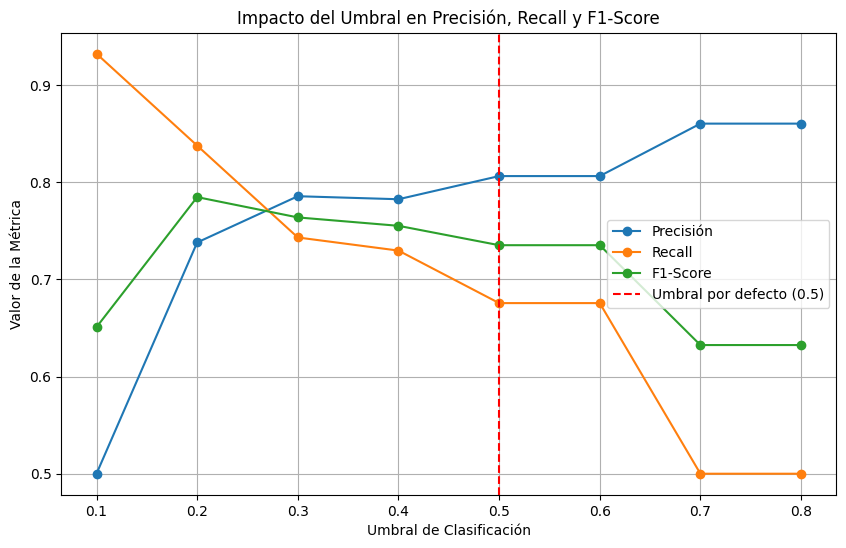

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.1)
precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred_temp = (y_pred_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_temp))
    recalls.append(recall_score(y_test, y_pred_temp))
    f1_scores.append(f1_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precisión', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral por defecto (0.5)')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor de la Métrica')
plt.title('Impacto del Umbral en Precisión, Recall y F1-Score')
plt.legend()
plt.grid()
plt.show()

## Curva de métricas vs. Umbral:

- A medida que el umbral aumenta (de 0.1 a 0.8), la precisión mejora, ya que el modelo se vuelve más estricto al clasificar como "Sobrevivió" (clase positiva). Sin embargo, esto disminuye el recall, porque muchos casos positivos reales son clasificados como negativos.
- Cuando el umbral es bajo (ej. 0.1), el recall es alto porque el modelo clasifica más casos como positivos, pero la precisión disminuye debido al aumento de falsos positivos.
- El F1-score (media armónica entre precisión y recall) alcanza su máximo en un punto intermedio, alrededor del umbral de 0.4 o 0.5. Este valor representa el mejor equilibrio entre precisión y recall.
- El umbral estándar ofrece un balance razonable entre precisión y recall, pero no es óptimo si queremos priorizar una métrica específica.
- Si queremos más recall (menos falsos negativos), deberíamos reducir el umbral (por ejemplo, a 0.3 o 0.4).
- Si queremos más precisión (menos falsos positivos), deberíamos aumentar el umbral (por ejemplo, a 0.6 o 0.7).

# Conclusión y Acciones

## Fortalezas del modelo
- Buena precisión (80.6%) en identificar a los sobrevivientes.
- Exactitud razonable (80%) en general.

## Áreas de mejora
- El recall de la clase "Sobrevivió" (67.6%) podría mejorarse, ya que está perdiendo más de un tercio de los casos positivos.

## Cómo mejorar el modelo basándonos en esto

### Aumentar el recall

- Ponderar más la clase 1 (class_weight='balanced' o manual).
- Sobremuestrear la clase positiva usando técnicas como SMOTE.

### Optimizar el balance entre precisión y recall:
- Ajustar el umbral de clasificación. Actualmente, el modelo usa 0.5 por defecto. Reducir el umbral puede aumentar el recall a costa de la precisión.

## Validar hiperparámetros:
- Experimentar con configuraciones como max_depth, min_samples_split y min_samples_leaf para reducir el sobreajuste o capturar mejor patrones en los datos.